In [8]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import json

def get_subpages(base_url):
    # Define the range of subpage numbers to extract links from
    start_page = 1
    end_page = 582

    # Initialize an empty list to store the links
    links = []
    subpage_pattern = 'page/{}'

    # Loop over the subpage numbers and extract the links
    for page_num in range(start_page, end_page+1):
        # Construct the URL for the current subpage
        url = base_url + subpage_pattern.format(page_num) + "/"
        links.append(url)

    return links

def get_article_links_and_dates(url):
    # Send a request to the URL and get the HTML response
    response = requests.get(url)
    html = response.text

    # Parse the HTML with BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')

    # Find all the div elements with class "item-details"
    item_details = soup.find_all('div', class_='item-details')

    # Initialize an empty dictionary to store the links and dates
    link_date_dict = {}

    # Loop over each "item-details" div and extract the link and date
    for item in item_details:
        link = item.find('a')['href']
        date_str = item.find('time')['datetime']

        # Convert the date string to a datetime object
        date = datetime.fromisoformat(date_str[:-6])

        # Format the datetime object as YYYY_mm_dd
        formatted_date = date.strftime('%Y_%m_%d')

        # Add the link to the dictionary
        if formatted_date in link_date_dict:
            link_date_dict[formatted_date].append(link)
        else:
            link_date_dict[formatted_date] = [link]

    return link_date_dict


In [9]:
# Define the base URL of the subpages
base_url = 'https://knightnews.com/category/news/'

# Get the links of all subpages
subpage_links = get_subpages(base_url)

# Initialize an empty dictionary to store links and dates
all_links_dates = {}

# Loop over all subpages, extract links and dates and store in the dictionaries
for subpage_url in subpage_links:
    links_dates_dict = get_article_links_and_dates(subpage_url)
    all_links_dates.update(links_dates_dict)

# Write the dictionary to a JSON file
with open('ucf_article_pages.json', 'w') as f:
    json.dump(all_links_dates, f, indent=4)

    ## Note ## 
    # Duplicates of the first three links were manually removed in 'ucf_article_pages.json'

KeyboardInterrupt: 

In [17]:
from helpers.txt_to_text import get_article_text
from helpers.make_txt_entry import make_txt_entry
import os
import json 

# Open the JSON file
with open('ucf_article_pages.json', 'r') as f:
    all_links_dates = json.load(f)

school_name = "UCF"
dates = sorted(all_links_dates.keys())

for date in reversed(dates):
    articles = all_links_dates[date]
    file_path = "journal_data/txt/"+school_name.replace(" ","_")+"/"+date+".txt"
    if(os.path.exists(file_path)):
        print(f"Date {date} already added.")
    else:
        article_text = ""
        for article in articles:
            article_text += get_article_text(article) + "\n"
            
        make_txt_entry(school_name="UCF", publication_date=date, text=article_text)
        print(f"Date {date} added.")

    ## Note ## 
    # Two outlier entries from 2000 were manually removed


Date 2023_04_22 already added.
Date 2023_04_08 already added.
Date 2023_04_03 already added.
Date 2023_03_23 already added.
Date 2023_03_22 already added.
Date 2023_03_17 already added.
Date 2023_03_13 already added.
Date 2023_03_12 already added.
Date 2023_03_08 already added.
Date 2023_02_21 already added.
Date 2023_02_20 already added.
Date 2023_02_04 already added.
Date 2022_12_15 already added.
Date 2022_12_08 already added.
Date 2022_12_06 already added.
Date 2022_11_14 already added.
Date 2022_11_08 already added.
Date 2022_11_07 already added.
Date 2022_11_03 already added.
Date 2022_10_26 already added.
Date 2022_10_24 already added.
Date 2022_10_22 already added.
Date 2022_10_19 already added.
Date 2022_10_12 already added.
Date 2022_10_06 already added.
Date 2022_10_02 already added.
Date 2022_09_30 already added.
Date 2022_09_29 already added.
Date 2022_09_28 already added.
Date 2022_09_27 already added.
Date 2022_09_26 already added.
Date 2022_09_25 already added.
Date 202

grouped_data/csv/UCF_Count.csv created.
grouped_data/pkl/yearly/UCF_Count.pkl being created.


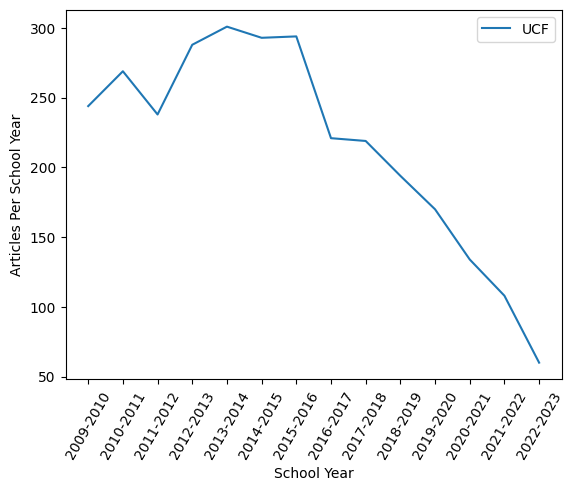

In [1]:
# Hyperparameters to Modify
school_name = 'UCF'
time_slice = 'yearly'

from helpers.graphers import grapher
from helpers.queries import one_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+'Count'
grapher(school_names=school_names,
        pipeline=[],
        query=one_query,
        y_label=f"Articles Per School Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")

grouped_data/csv/UCF_Hillel.csv created.
grouped_data/pkl/monthly/UCF_Hillel.pkl being created.


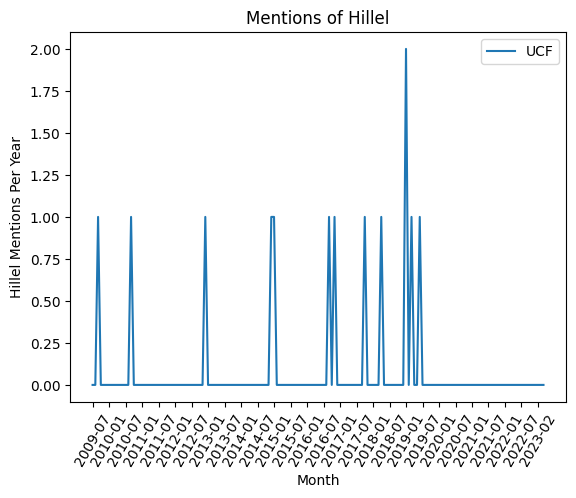

In [2]:
# Hyperparameters to Modify
school_name = 'UCF'
string = "Hillel"
time_slice = 'monthly'

from helpers.graphers import grapher
from helpers.queries import count_query

school_names = [school_name]
save_pattern = '_'.join(school_names)+'_'+string.replace(' ','_')
grapher(school_names=school_names,
        pipeline=[],
        query=count_query(string),
        y_label=f"{string} Mentions Per Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice=time_slice,
        title=f"Mentions of {string}",
        img_path=f"figures/{school_name}/{save_pattern}_{time_slice}.png")

grouped_data/csv/McGill_UCF_UCSD_UF_UMich_USC_York_Count.csv already exists.
grouped_data/pkl/yearly/McGill_UCF_UCSD_UF_UMich_USC_York_Count.pkl being read.


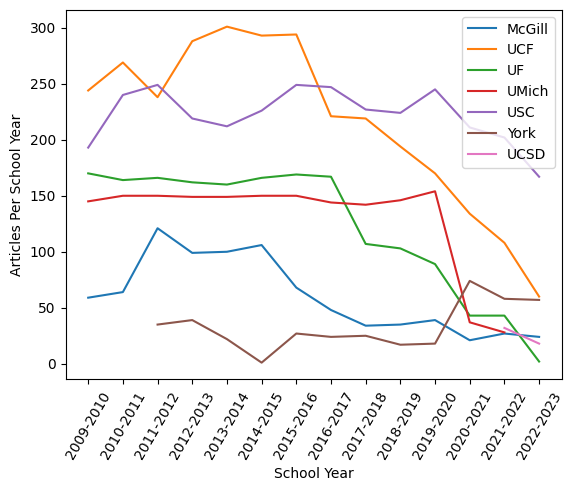

In [3]:
from helpers.graphers import grapher
from helpers.queries import one_query

import os

school_names = os.listdir('journal_data/txt')
save_pattern = '_'.join(school_names)+'_'+'Count'
grapher(school_names=school_names,
        pipeline=[],
        query=one_query,
        y_label=f"Articles Per School Year",
        data_path="grouped_data",
        data_name=save_pattern,
        time_slice='yearly')